In [1]:
import data_functions as dat
import matplotlib.pyplot as mp
import os

mp.style.use('signature.mplstyle')

In [2]:
path = r"C:\Users\sk88\Documents\Python\New folder\TPA"

In [3]:
lock_hp = dat.read_json(os.path.join(path,'2301_lock_HP_norm_995_area.json'))
lock_lp = dat.read_json(os.path.join(path,'2301_lock_LP_norm_995_area.json'))
unlock_hp = dat.read_json(os.path.join(path,'2301_unlock_HP_norm_995_area.json'))
unlock_lp = dat.read_json(os.path.join(path,'2301_unlock_LP_norm_995_area.json'))

In [4]:
high = [lock_hp['norm_cph_sph'], lock_hp['norm_cph_spl'], lock_lp['norm_cph_sph'], lock_lp['norm_cph_spl'], unlock_hp['norm_cph_sph'], unlock_hp['norm_cph_spl'], unlock_lp['norm_cph_sph'], unlock_lp['norm_cph_spl']]
labels = ['lock_hp', 'lock_lp', 'unlock_hp', 'unlock_lp']
low = [lock_hp['norm_cpl_sph'], lock_hp['norm_cpl_spl'], lock_lp['norm_cpl_sph'], lock_lp['norm_cpl_spl'], unlock_hp['norm_cpl_sph'], unlock_hp['norm_cpl_spl'], unlock_lp['norm_cpl_sph'], unlock_lp['norm_cpl_spl']]

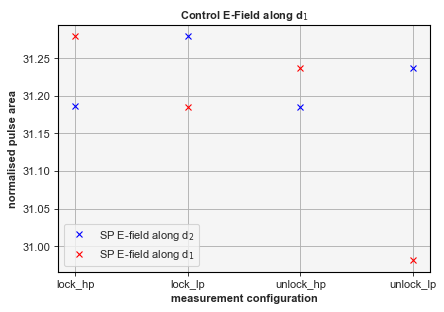

In [5]:
fig, ax = mp.subplots()
for i, value in enumerate(labels):
    ax.plot(value, high[i], 'xb')
    ax.plot(value, high[i+1], 'xr')

ax.set(xlabel='measurement configuration', ylabel='normalised pulse area')
ax.set(title='Control E-Field along d$_{1}$')
ax.legend(['SP E-field along d$_{2}$', 'SP E-field along d$_{1}$'])

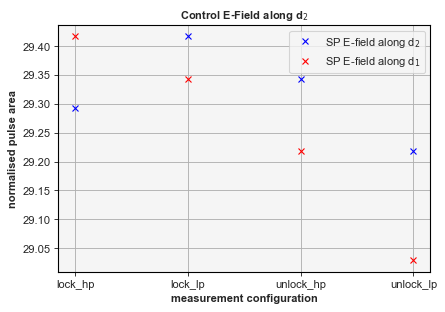

In [6]:
fig, ax = mp.subplots()
for i, value in enumerate(labels):
    ax.plot(value, low[i], 'xb')
    ax.plot(value, low[i+1], 'xr')

ax.set(xlabel='measurement configuration', ylabel='normalised pulse area')
ax.set(title='Control E-Field along d$_{2}$')
ax.legend(['SP E-field along d$_{2}$', 'SP E-field along d$_{1}$'])

In [7]:
high_1901 = dat.read_json(os.path.join(path,'1901_unlocked_HP_norm_995_area.json'))
low_1901 = dat.read_json(os.path.join(path,'1901_unlocked_LP_norm_995_area.json'))
high_p2GHz_1901 = dat.read_json(os.path.join(path,'1901_unlocked_HP_p2GHz_norm_995_area.json'))
low_p2GHz_1901 = dat.read_json(os.path.join(path,'1901_unlocked_LP_p2GHz_norm_995_area.json'))
high_p4GHz_1901 = dat.read_json(os.path.join(path,'1901_unlocked_HP_p4GHz_norm_995_area.json'))
low_p4GHz_1901 = dat.read_json(os.path.join(path,'1901_unlocked_LP_p4GHz_norm_995_area.json'))

In [8]:
labels = ['hp_res', 'lp_res', 'hp_p2GHz', 'lp_p2GHz', 'hp_p4GHz', 'lp_p4GHz']

In [9]:
high_19 = [high_1901['norm_cph_sph'], high_1901['norm_cph_spl'], low_1901['norm_cph_sph'], low_1901['norm_cph_spl'], high_p2GHz_1901['norm_cph_sph'], high_p2GHz_1901['norm_cph_spl'], low_p2GHz_1901['norm_cph_sph'], low_p2GHz_1901['norm_cph_spl'], high_p4GHz_1901['norm_cph_sph'], high_p4GHz_1901['norm_cph_spl'], low_p4GHz_1901['norm_cph_sph'],low_p4GHz_1901['norm_cph_spl']]
low_19 = [high_1901['norm_cpl_sph'], high_1901['norm_cpl_spl'], low_1901['norm_cpl_sph'], low_1901['norm_cpl_spl'], high_p2GHz_1901['norm_cpl_sph'], high_p2GHz_1901['norm_cpl_spl'], low_p2GHz_1901['norm_cpl_sph'], low_p2GHz_1901['norm_cpl_spl'], high_p4GHz_1901['norm_cpl_sph'], high_p4GHz_1901['norm_cpl_spl'], low_p4GHz_1901['norm_cpl_sph'],low_p4GHz_1901['norm_cpl_spl']]

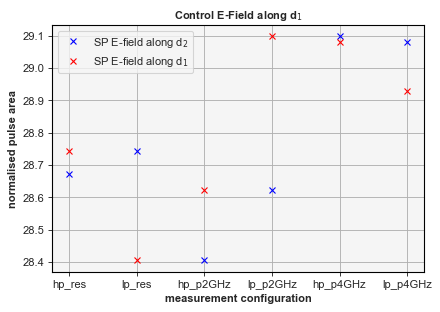

In [10]:
fig, ax = mp.subplots()
for i, value in enumerate(labels):
    ax.plot(value, high_19[i], 'xb')
    ax.plot(value, high_19[i+1], 'xr')

ax.set(xlabel='measurement configuration', ylabel='normalised pulse area')
ax.set(title='Control E-Field along d$_{1}$')
ax.legend(['SP E-field along d$_{2}$', 'SP E-field along d$_{1}$'])

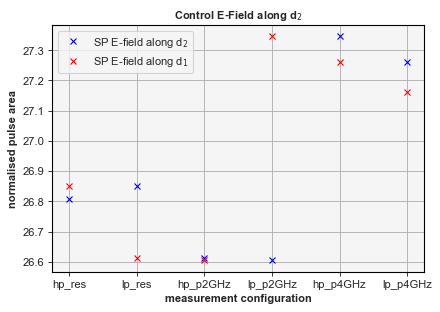

In [11]:
fig, ax = mp.subplots()
for i, value in enumerate(labels):
    ax.plot(value, low_19[i], 'xb')
    ax.plot(value, low_19[i+1], 'xr')

ax.set(xlabel='measurement configuration', ylabel='normalised pulse area')
ax.set(title='Control E-Field along d$_{2}$')
ax.legend(['SP E-field along d$_{2}$', 'SP E-field along d$_{1}$'])

In [12]:
lock_hp_od = dat.read_json(os.path.join(path,'2301_lock_HP_od_995.json'))
lock_lp_od = dat.read_json(os.path.join(path,'2301_lock_LP_od_995.json'))
unlock_hp_od = dat.read_json(os.path.join(path,'2301_unlock_HP_od_995.json'))
unlock_lp_od = dat.read_json(os.path.join(path,'2301_unlock_LP_od_995.json'))

In [15]:
od_high = [lock_hp_od['od_cph_sph'], lock_hp_od['od_cph_spl'], lock_lp_od['od_cph_sph'], lock_lp_od['od_cph_spl'], unlock_hp_od['od_cph_sph'], unlock_hp_od['od_cph_spl'], unlock_lp_od['od_cph_sph'], unlock_lp_od['od_cph_spl']]
od_labels = ['lock_hp', 'lock_lp', 'unlock_hp', 'unlock_lp']
od_low = [lock_hp_od['od_cpl_sph'], lock_hp_od['od_cpl_spl'], lock_lp_od['od_cpl_sph'], lock_lp_od['od_cpl_spl'], unlock_hp_od['od_cpl_sph'], unlock_hp_od['od_cpl_spl'], unlock_lp_od['od_cpl_sph'], unlock_lp_od['od_cpl_spl']]

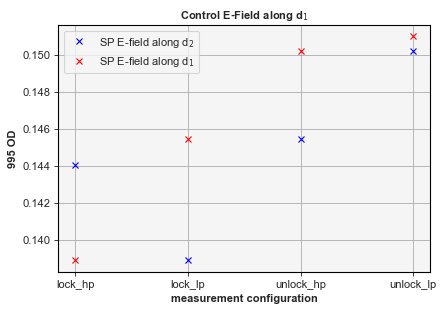

In [16]:
fig, ax = mp.subplots()
for i, value in enumerate(od_labels):
    ax.plot(value, od_high[i], 'xb')
    ax.plot(value, od_high[i+1], 'xr')

ax.set(xlabel='measurement configuration', ylabel='995 OD')
ax.set(title='Control E-Field along d$_{1}$')
ax.legend(['SP E-field along d$_{2}$', 'SP E-field along d$_{1}$'])

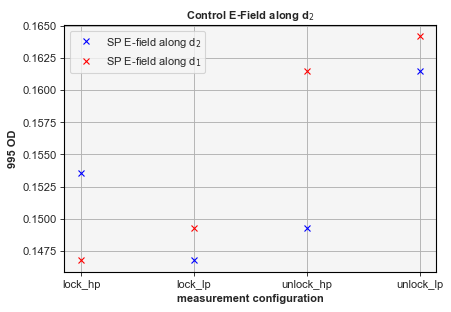

In [17]:
fig, ax = mp.subplots()
for i, value in enumerate(od_labels):
    ax.plot(value, od_low[i], 'xb')
    ax.plot(value, od_low[i+1], 'xr')

ax.set(xlabel='measurement configuration', ylabel='995 OD')
ax.set(title='Control E-Field along d$_{2}$')
ax.legend(['SP E-field along d$_{2}$', 'SP E-field along d$_{1}$'])